In [33]:
# Plot the hourly STA-LTA detection numbers for the observation period

In [34]:
## Importing modules
from os.path import join, dirname   
from matplotlib.pyplot import subplots
from matplotlib.dates import DateFormatter
from matplotlib.dates import DayLocator
from pandas import read_csv, to_datetime, DataFrame

In [35]:
## Inputs
datapath = "/Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on10_off2/hourly_detection_numbers.csv"
stations_inner = ["A01", "A02", "A03", "A04", "A05", "A06", "B01", "B02", "B03", "B04", "B05", "B06"]

ymax = 3800

In [36]:
## Read the data
df = read_csv(datapath, na_values=["nan"], parse_dates=["hour"])


<class 'numpy.datetime64'>
Saved figure to /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on10_off2/hourly_detection_numbers.png


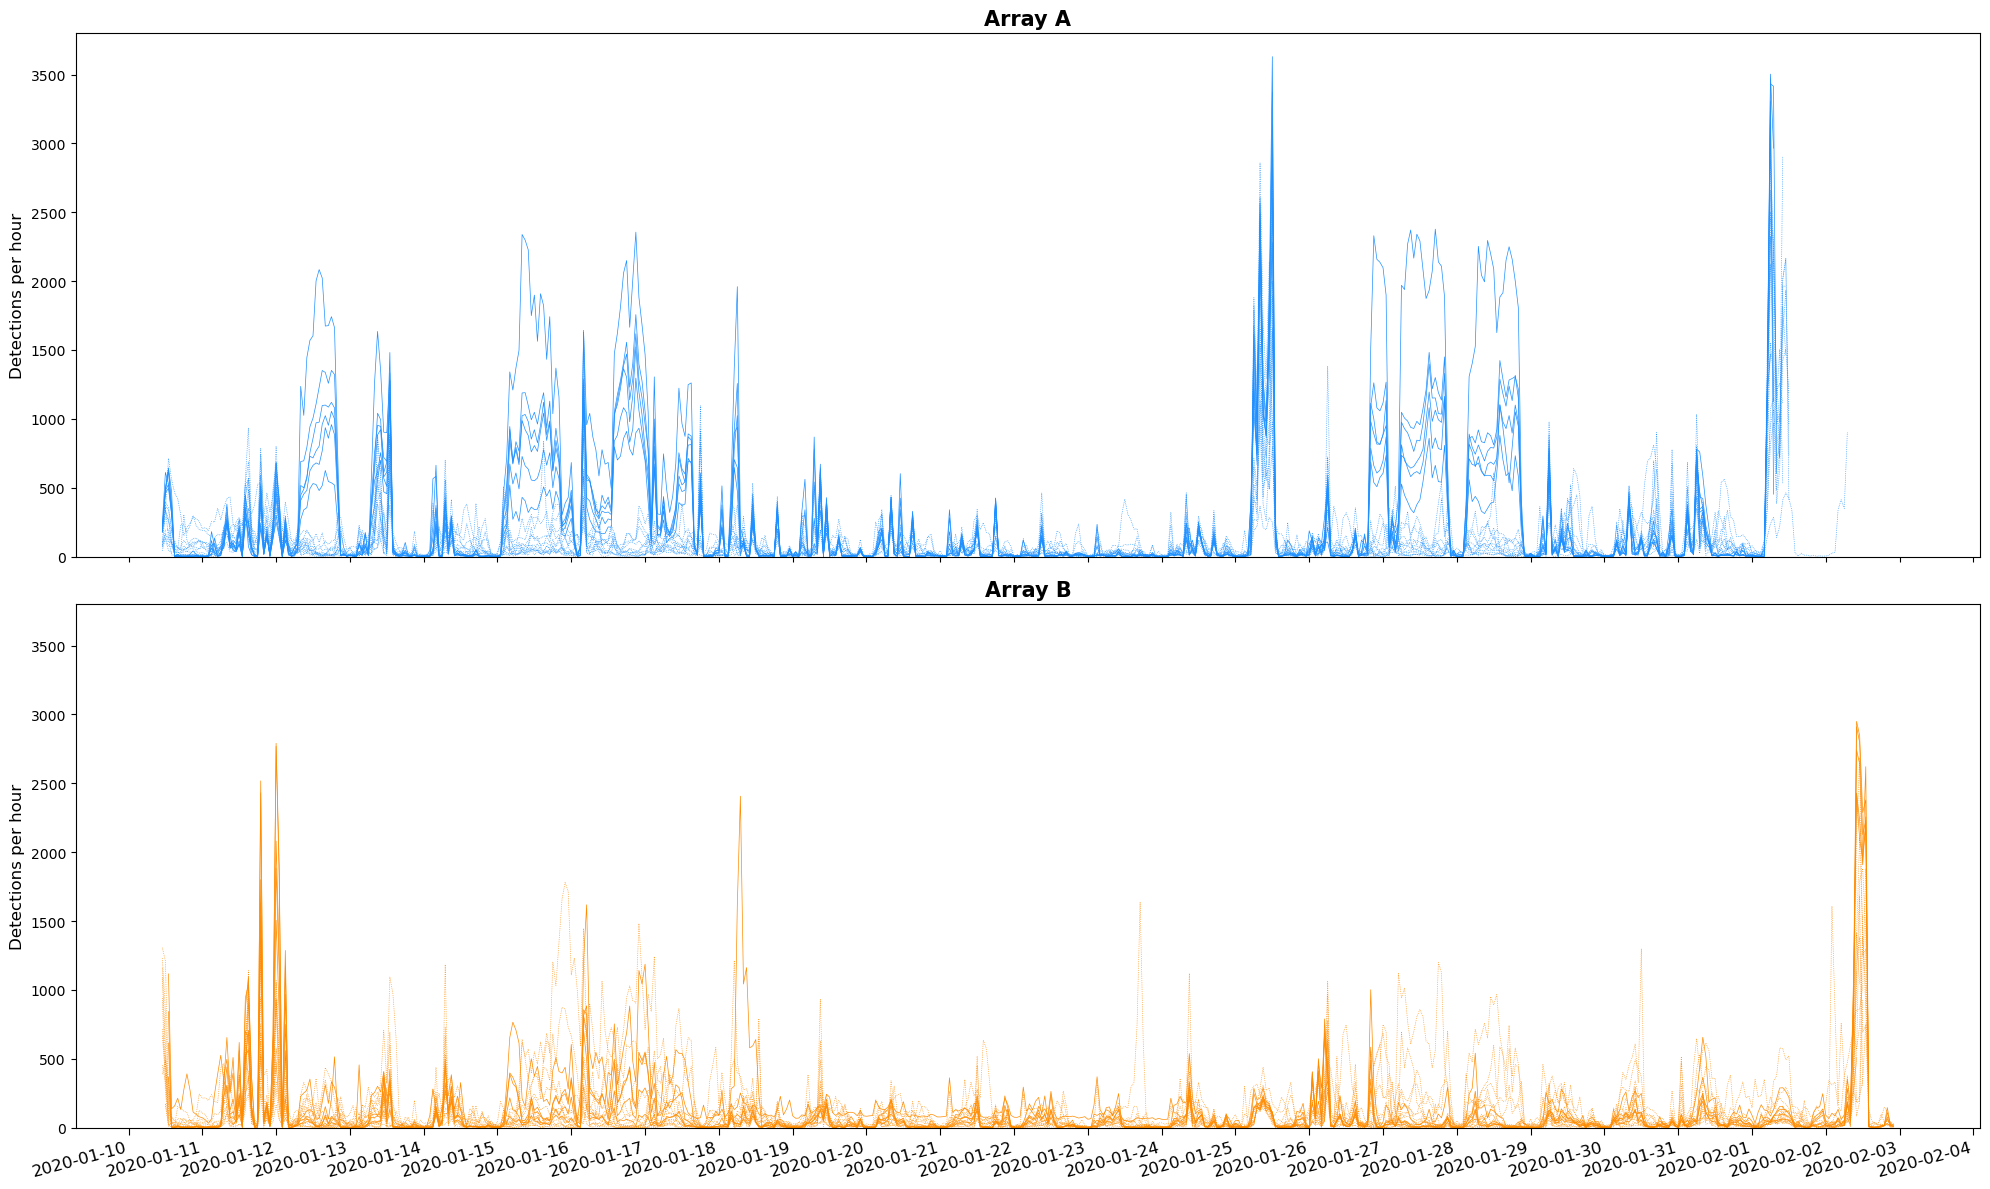

In [60]:
from matplotlib.dates import DayLocator
fig, axes = subplots(2, 1, sharex=True, figsize=(20, 12))

timeax = df["hour"].values
print(type(timeax[0]))

df_sta = df.iloc[:, 1:]
for station, data in df_sta.items():
    if station.startswith("A"):
        if station in stations_inner:
            axes[0].plot(timeax, data, color="dodgerblue", label=station, linewidth=0.5)
        else:
            axes[0].plot(timeax, data, color="dodgerblue", label=station, linestyle=":", linewidth=0.5) 
    else:
        if station in stations_inner:
            axes[1].plot(timeax, data, color="darkorange", label=station, linewidth=0.5)
        else:
            axes[1].plot(timeax, data, color="darkorange", label=station, linestyle=":", linewidth=0.5)

axes[0].set_ylim(0, ymax)
axes[1].set_ylim(0, ymax)

axes[0].set_ylabel("Detections per hour", fontsize=12)
axes[1].set_ylabel("Detections per hour", fontsize=12)

axes[0].set_title("Array A", fontsize=15, fontweight="bold")
axes[1].set_title("Array B", fontsize=15, fontweight="bold")

## Set x ticks and labels
axes[1].tick_params(axis='x', which='major', length=5)
axes[1].xaxis.set_major_locator(DayLocator(interval=1))

for label in axes[1].get_xticklabels():
    label.set_va('top')  # Vertical alignment for y-axis label
    label.set_ha('right')
    label.set_rotation(15)
    label.set_fontsize(12)

## Save the figure
fig.tight_layout()
fig.patch.set_alpha(0)

outdir = dirname(datapath)
outpath = join(outdir, "hourly_detection_numbers.png")
fig.savefig(outpath, dpi=300)
print(f"Saved figure to {outpath}")


In [38]:
## Save the figure
fig.tight_layout()

outdir = dirname(datapath)
outpath = join(outdir, "hourly_detection_numbers.png")
fig.savefig(outpath, dpi=300, transparent=True)